### Import all package

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [126]:
data = pd.read_csv('C:/Users/LABKOM/Downloads/5210411135/data/Data.csv')
data.shape

(15, 4)

In [127]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [128]:
data['Age'].fillna(28, inplace=True)
data.loc[3, 'Salary'] = 50000

data.head()

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,50000.0,No
4,China,55.0,98000.0,Yes


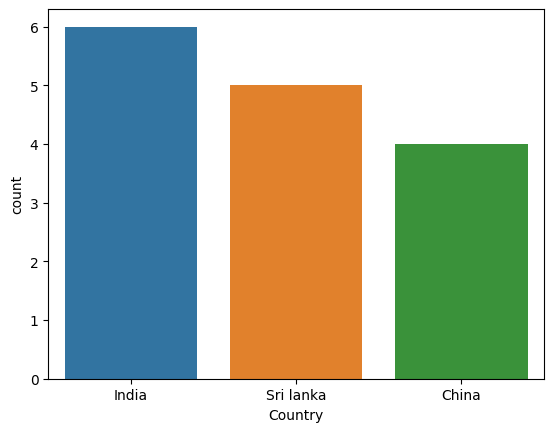

In [129]:
bar = sns.countplot(data=data, x='Country') # max 5 category variations

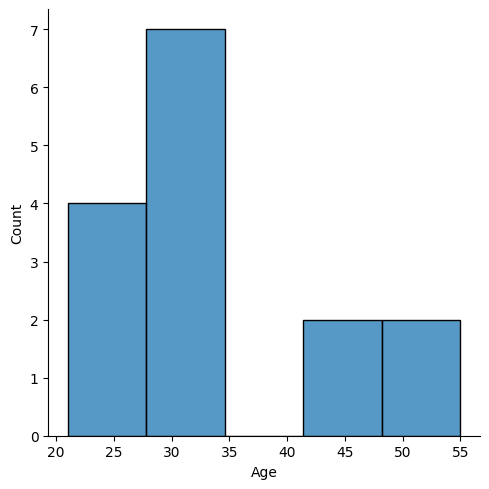

In [130]:
bar2 = sns.displot(data=data, x='Age')

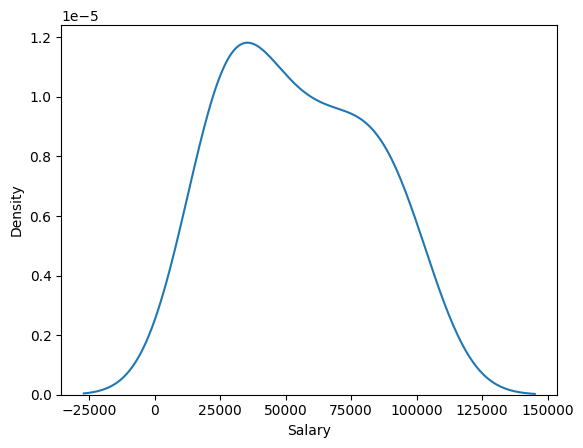

In [131]:
lines = sns.kdeplot(data=data, x='Salary') # ranges

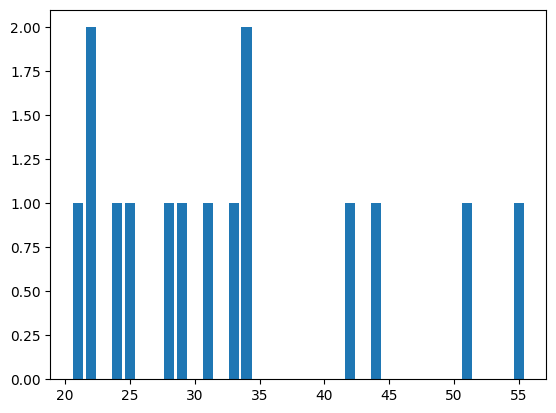

In [132]:
x = list(data['Age'].unique())
y = list(data['Age'].value_counts())

# fig = plt.figure(figsize=(6,3))
plt.bar(x, y)
plt.show()
# value

In [133]:
ft = data.iloc[:,:3].values
lb = data.iloc[:,3].values

In [134]:
enc = LabelEncoder()
ft[:,0] = enc.fit_transform(ft[:,0])
ft

array([[1, 34.0, 92000.0],
       [2, 22.0, 25000.0],
       [0, 31.0, 74000.0],
       [2, 29.0, 50000.0],
       [0, 55.0, 98000.0],
       [1, 24.0, 30000.0],
       [2, 28.0, 40000.0],
       [1, 28.0, 60000.0],
       [0, 51.0, 89000.0],
       [1, 44.0, 78000.0],
       [2, 21.0, 20000.0],
       [0, 25.0, 30000.0],
       [1, 33.0, 45000.0],
       [1, 42.0, 65000.0],
       [2, 33.0, 22000.0]], dtype=object)

In [135]:
x_train, x_test, y_train, y_test = train_test_split(ft, lb, test_size=0.2, random_state=0, shuffle=False)
dimensi = f'dimensi x_train\t: {x_train.shape}\ndimensi x_test\t: {x_test.shape}\ndimensi y_train\t: {y_train.shape}\ndimensi y_test\t: {y_test.shape}\n'
print(dimensi)

dimensi x_train	: (12, 3)
dimensi x_test	: (3, 3)
dimensi y_train	: (12,)
dimensi y_test	: (3,)



In [136]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

In [137]:
y_predict = knn.predict(x_test)
metrics.accuracy_score(y_test, y_predict)

0.6666666666666666

In [138]:
print(y_test)
print(y_predict)

['Yes' 'Yes' 'No']
['No' 'Yes' 'No']


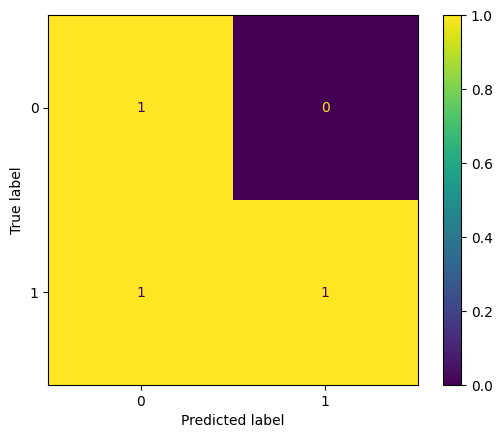

In [141]:
cm = metrics.confusion_matrix(y_test,y_predict, labels=['No','Yes'])
disp_cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp_cm.plot()
plt.show()